In [77]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Contingency Tables

In [29]:
#Drawing Contingency table for 2 variables 
pd.crosstab(df['class'], df['alive'])

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [31]:
#Drawing Contingency table for more than 2 variables 
pd.pivot_table(df, index=['class', 'who'], columns='alive', aggfunc='size', fill_value=0)

alive          no  yes
class  who            
First  child    1    5
       man     77   42
       woman    2   89
Second child    0   19
       man     91    8
       woman    6   60
Third  child   33   25
       man    281   38
       woman   58   56

## Kernel Density estimation 

In [40]:
series = df['age'].dropna()     

<AxesSubplot:xlabel='age', ylabel='Count'>

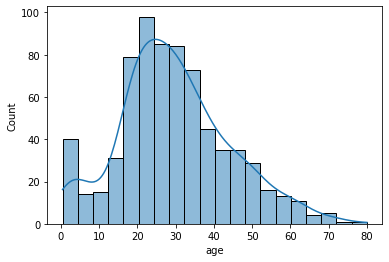

In [74]:
sns.histplot(series,kde=True)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


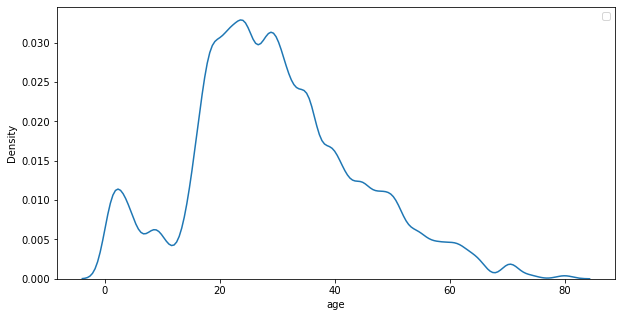

In [69]:
plt.figure(figsize=(10, 5))
sns.kdeplot(series, kernel='gauss', bw=0.1)
plt.legend()
plt.show()

In [70]:
#how to get help sns plots 
import seaborn as sns

sns.kdeplot?

##  Cumulative Distributed Function

In [125]:
pmf = {}
cnt = series.count()
for i in series:
    pmf[i] = list(series).count(i)/cnt
    
pmf2 = dict(sorted(pmf.items()))
cum_series = np.cumsum(list(pmf2.values()))

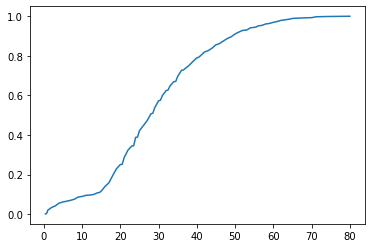

In [129]:
x = np.array(list(pmf2.keys()))
y = cum_series
plt.plot(x,y)

## Normal Distribution

In [131]:
from scipy.stats import norm

In [145]:
#probability density at any point 
print(norm.pdf(0,0,1))

0.3989422804014327


In [141]:
#area between two standard devaition where Mu = 0, S.d = 1
print(norm.cdf(1, 0, 1)-norm.cdf(-1, 0, 1))

0.6826894921370859
